# SUOD - Scalable Unsupervised Outlier Detection
### SUOD is an acceleration framework for large scale unsupervised outlier detector training and prediction
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.suod

### Arguments that work with SUOD algorithm:
1. base_estimators
2. contamination
3. combination
4. n_jobs
5. rp_clf_list
6. rp_ng_clf_list
7. rp_flag_global
8. target_dim_frac
9. jl_method
10. bps_flag
11. approx_clf_list
12. approx_ng_clf_list
13. approx_flag_global
14. approx_clf
15. cost_forecast_loc_fit
16. cost_forecast_loc_pred
17. verbose

In [40]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
histograms = O.Features.get_features(imgs, feature_type="hist", norm_type="minmax")

get2D                    ...took    42.304651 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


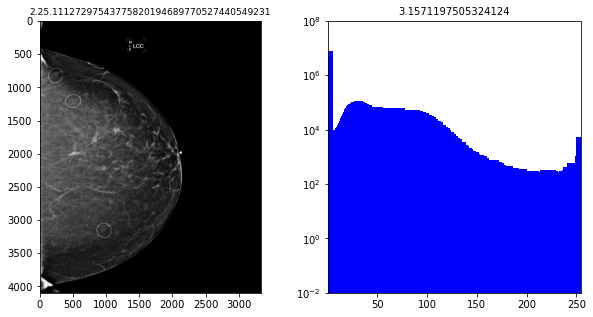

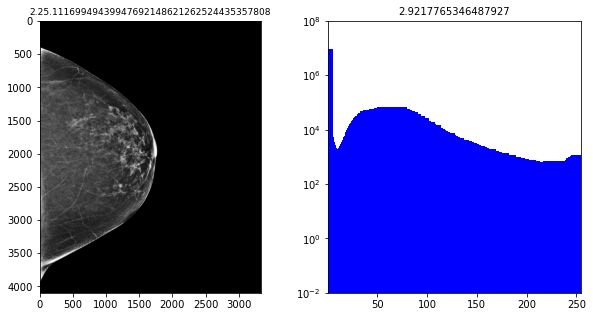

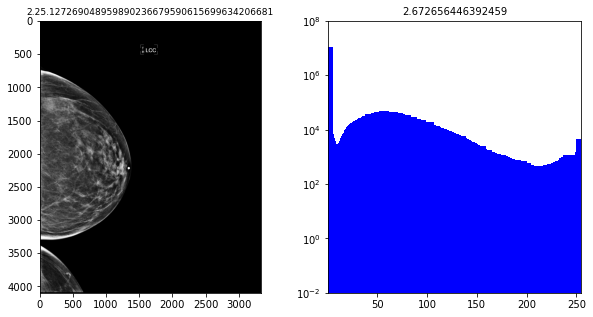

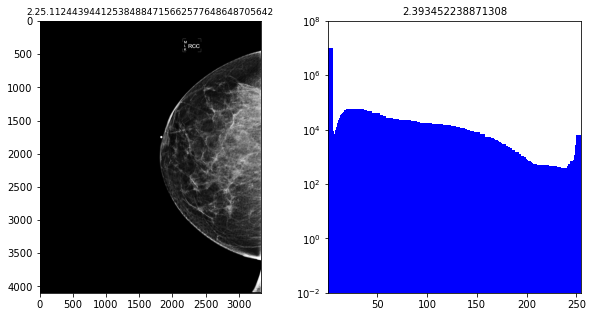

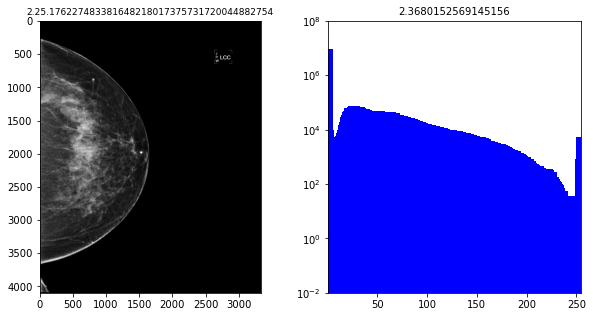

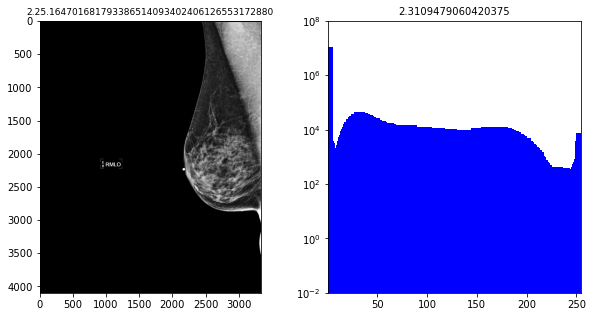

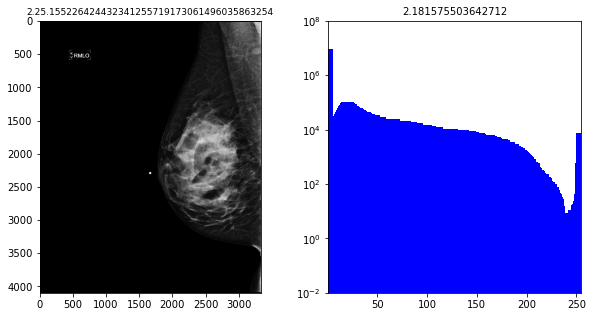

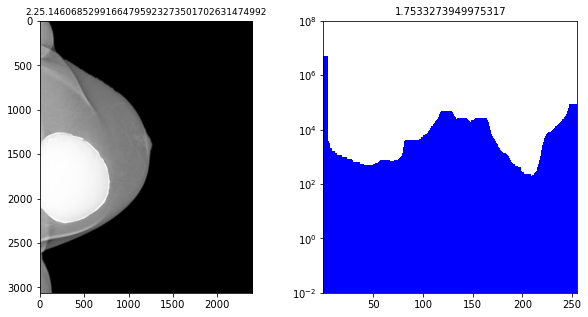

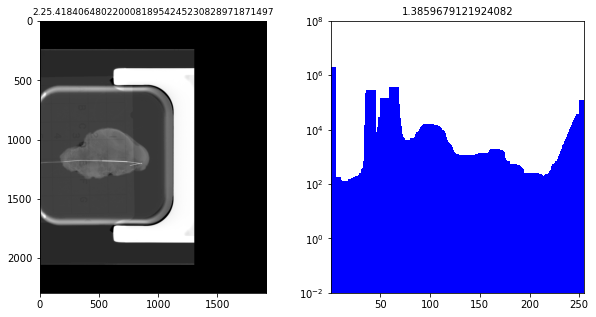

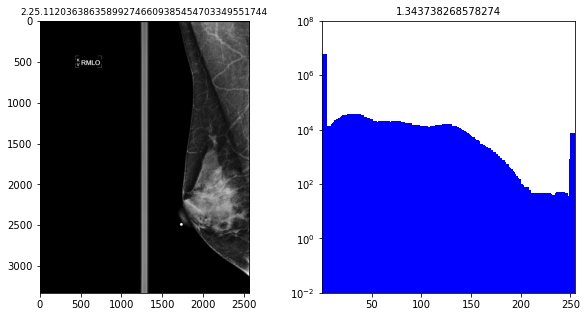

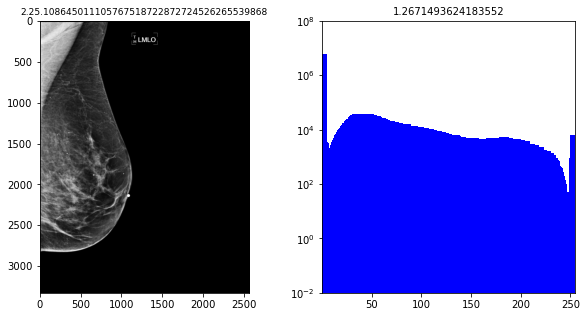

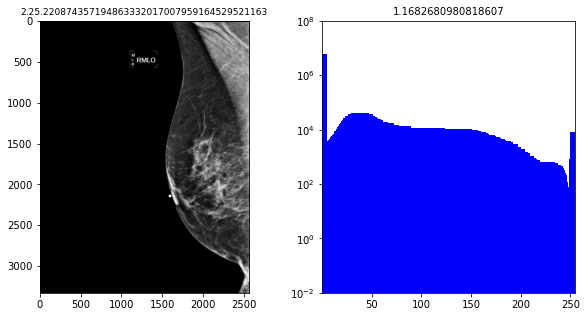

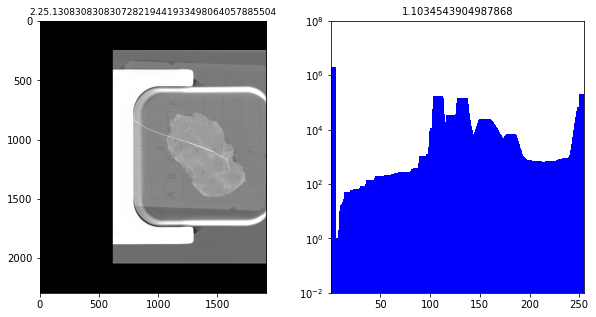

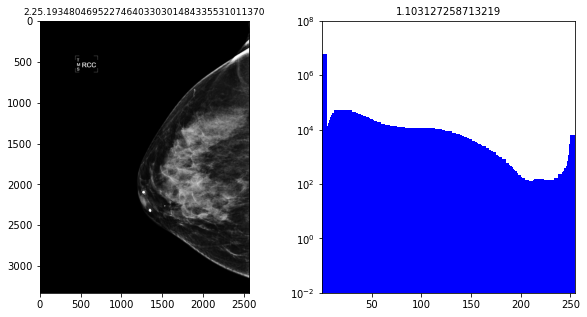

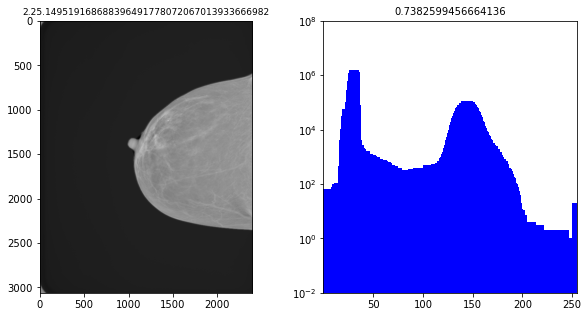

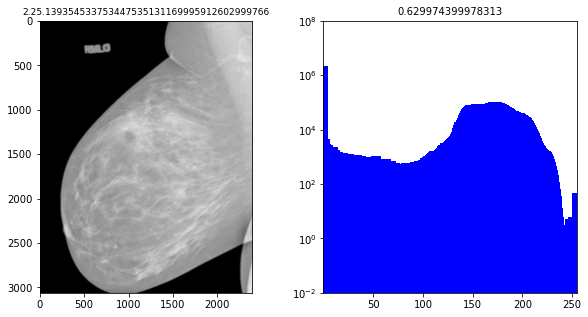

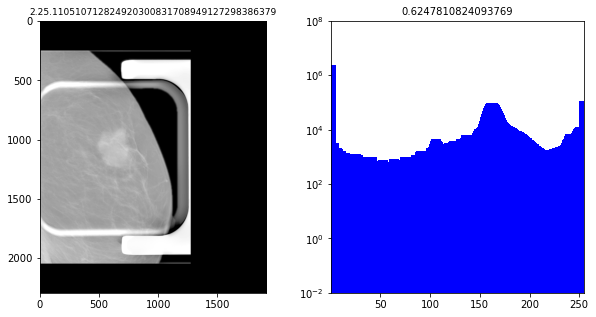

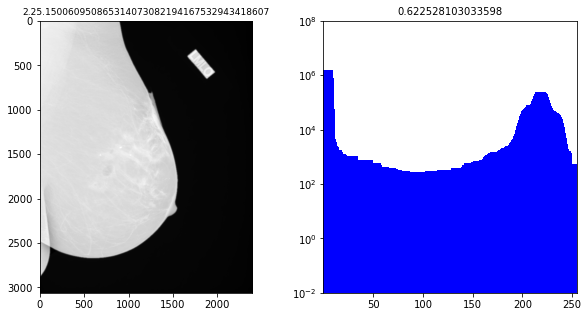

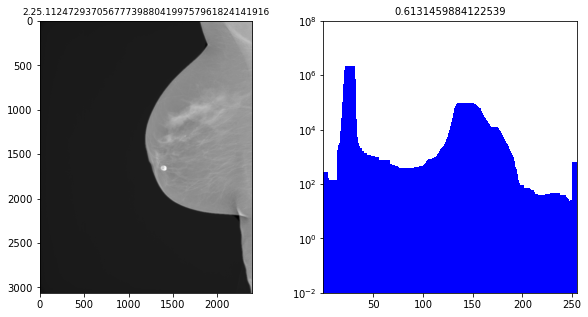

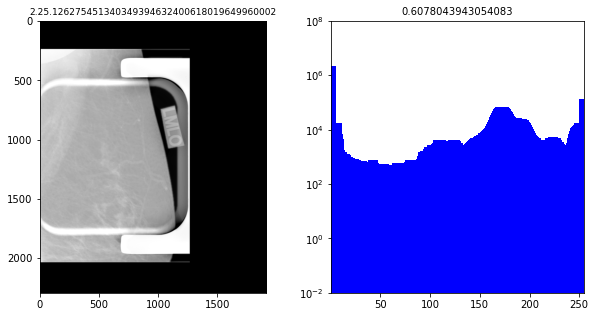

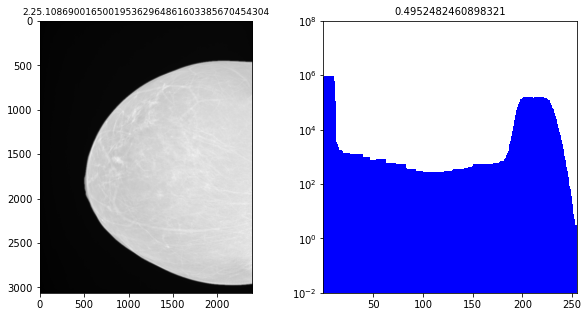

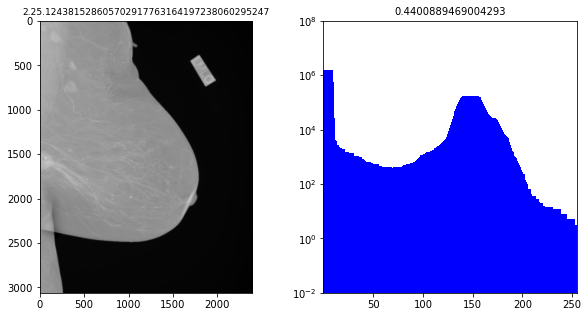

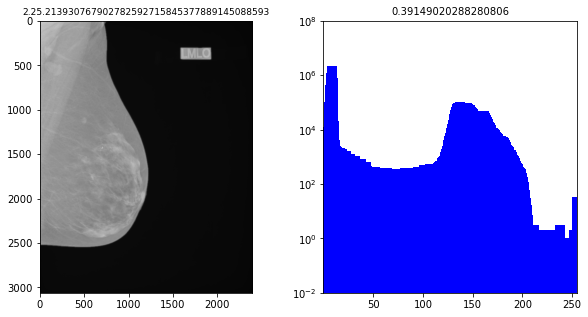

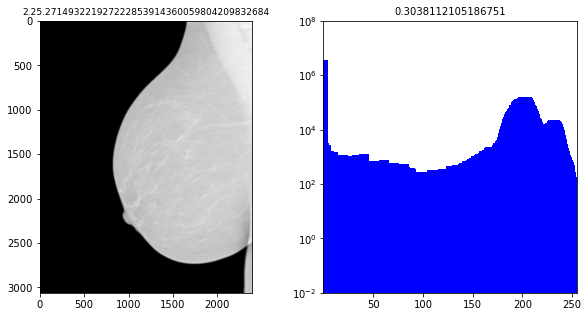

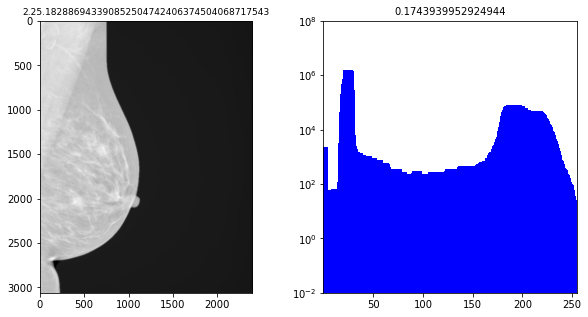

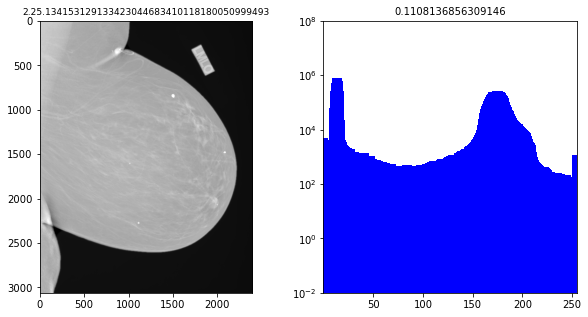

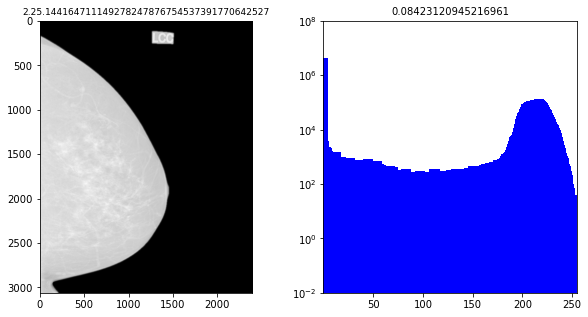

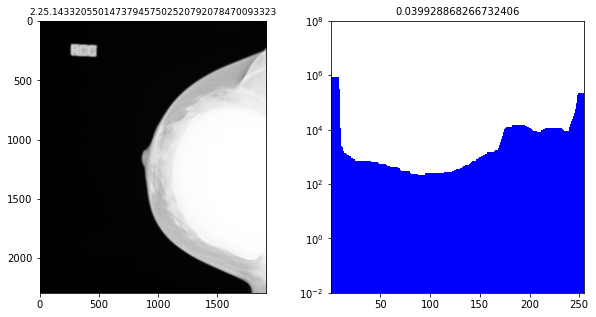

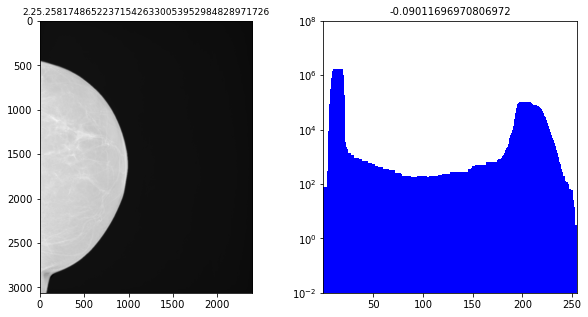

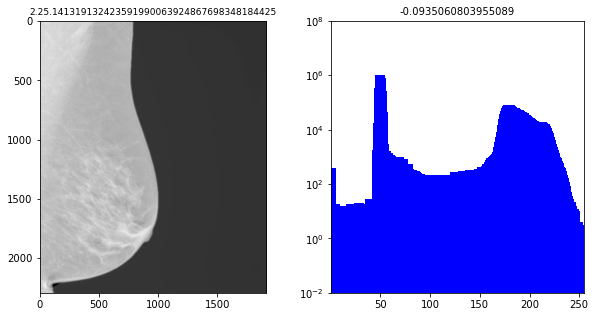

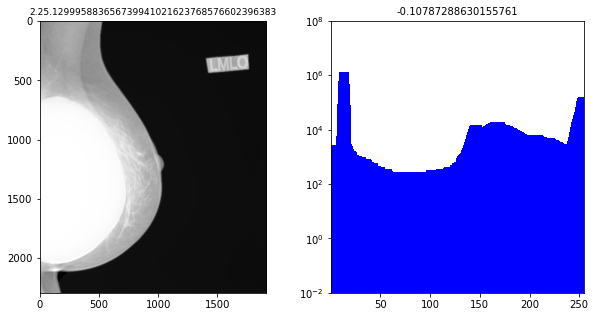

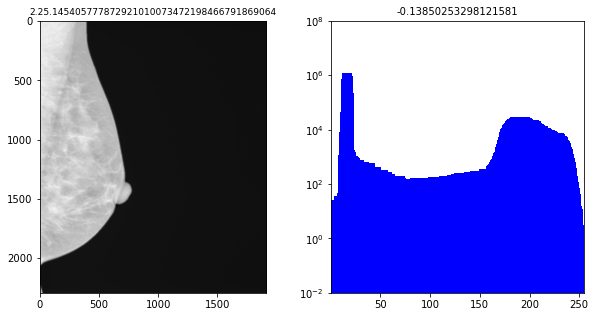

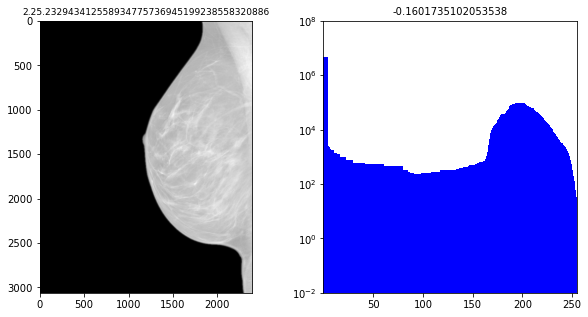

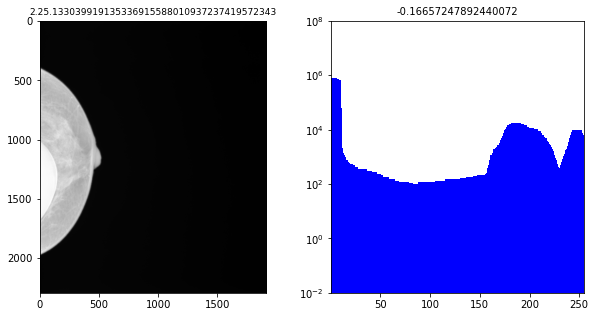

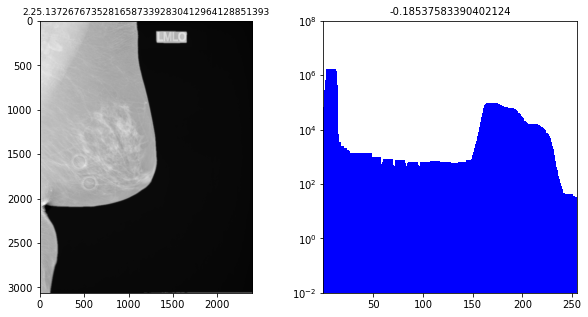

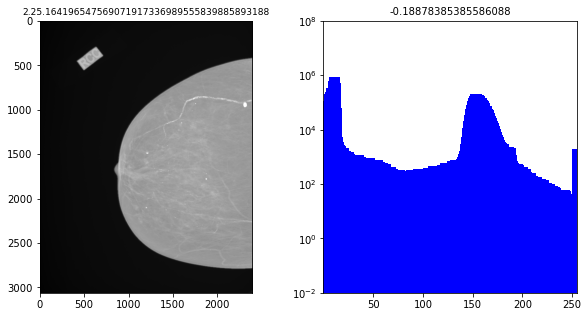

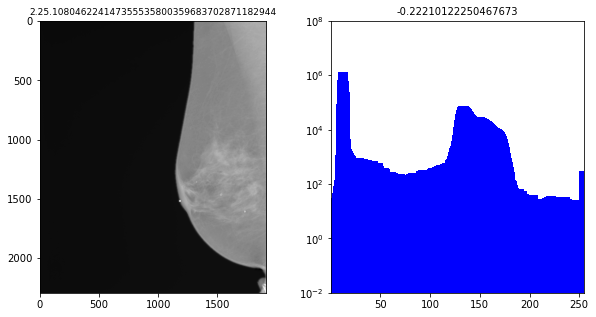

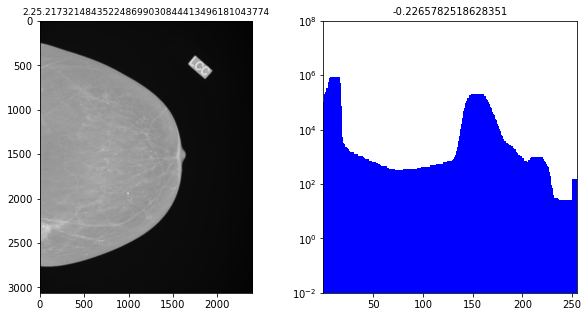

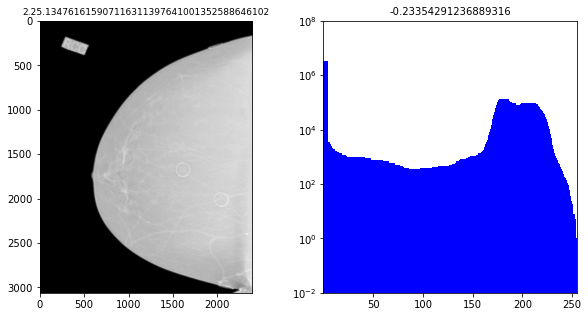

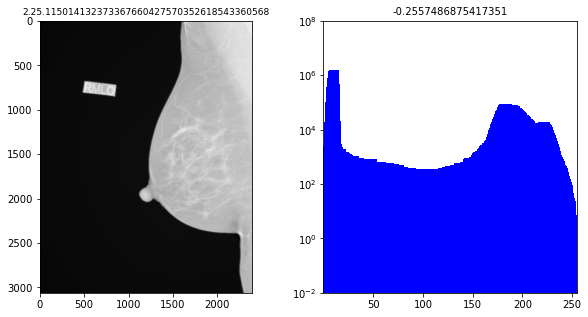

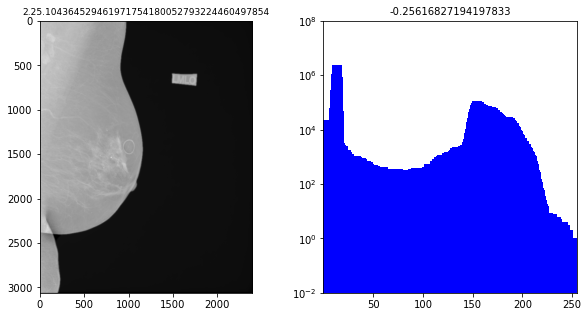

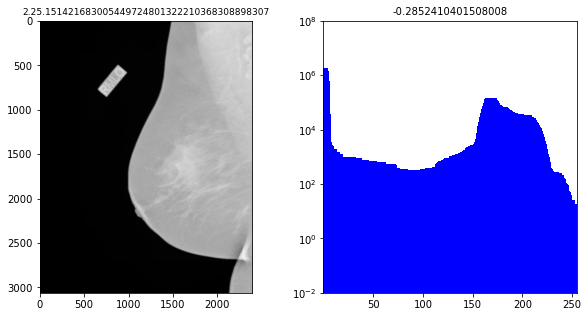

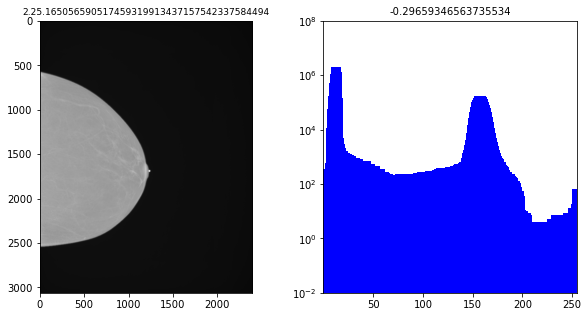

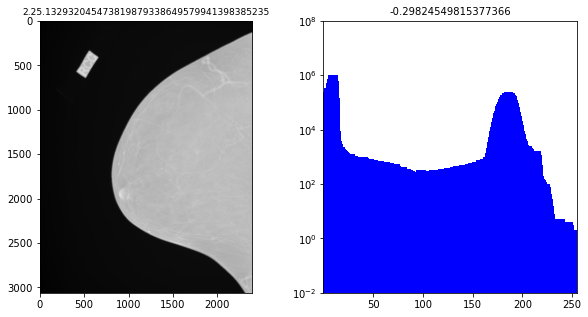

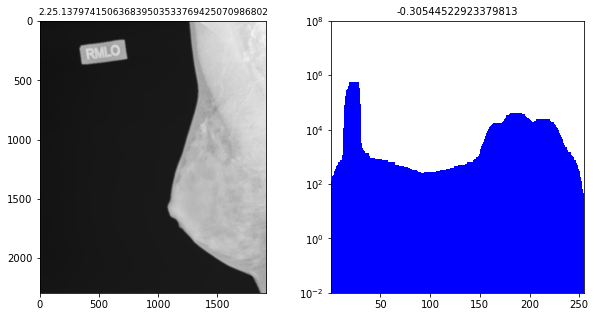

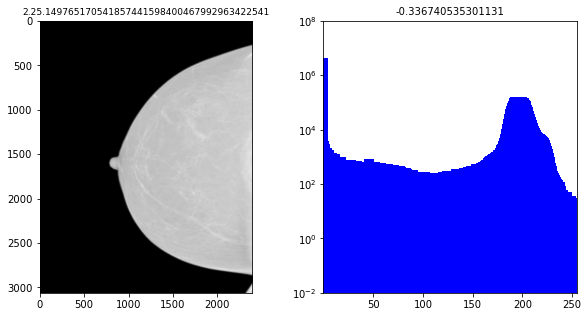

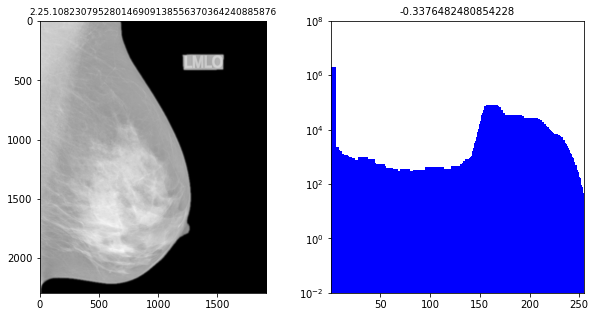

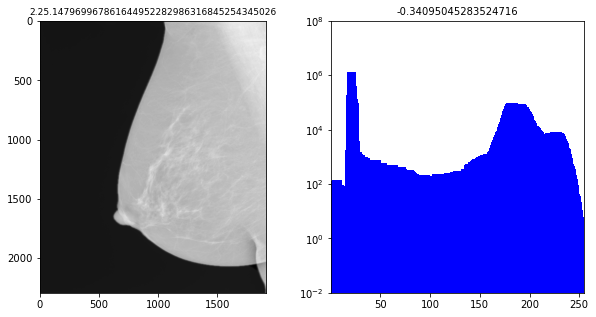

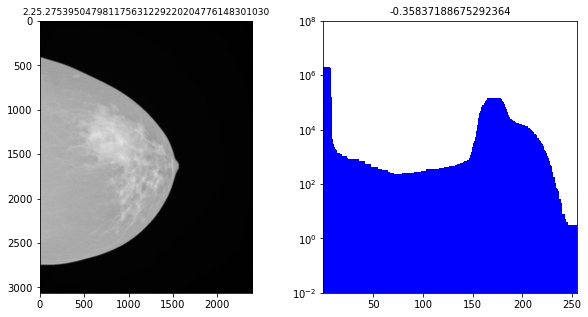

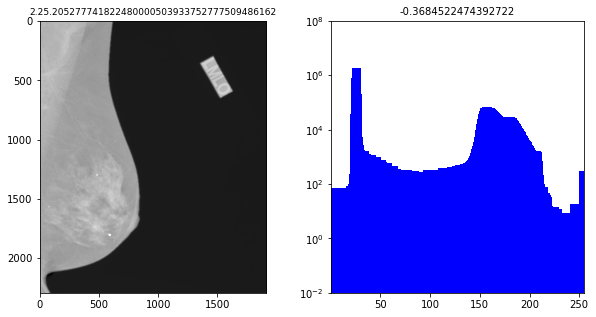

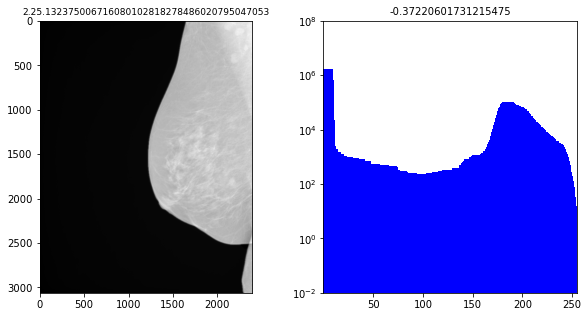

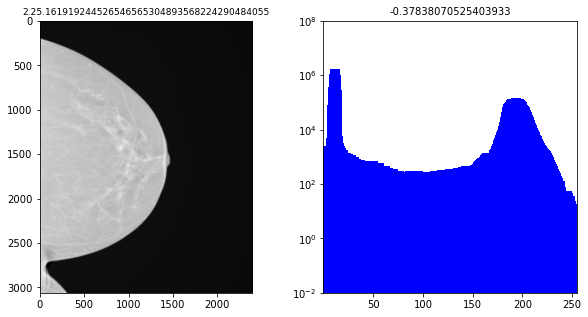

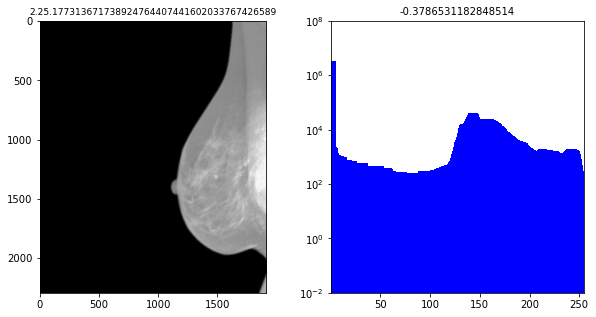

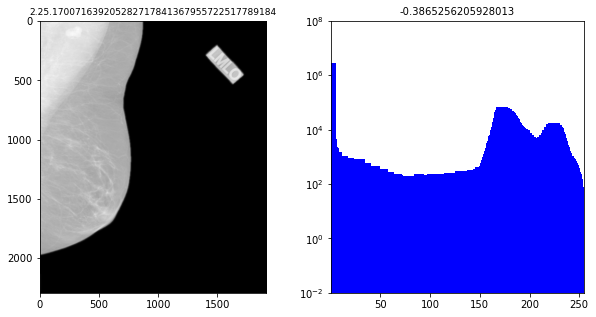

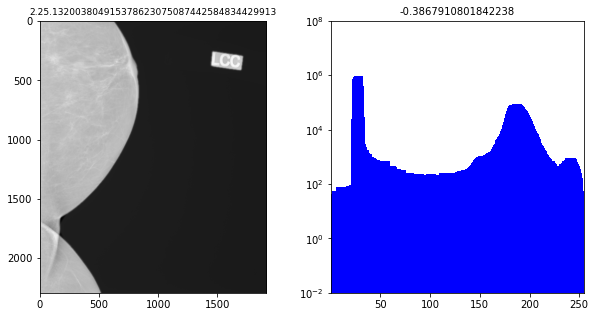

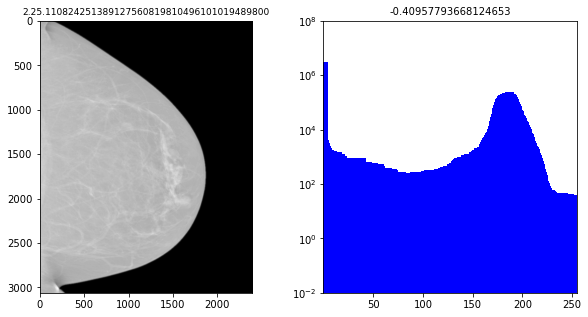

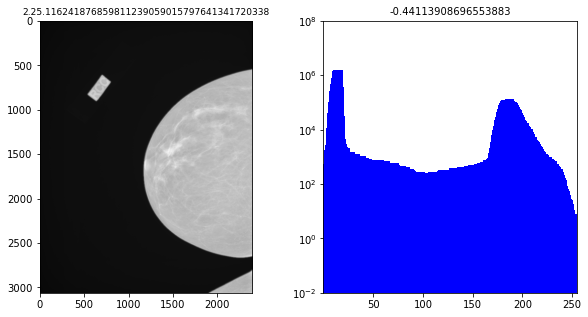

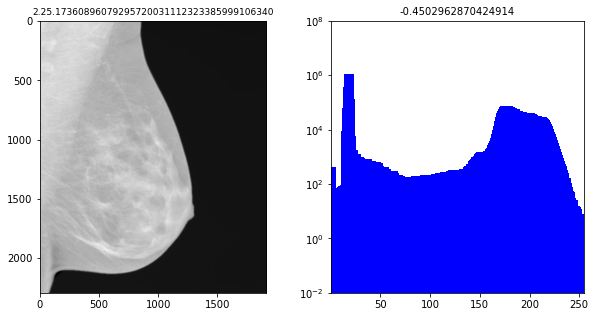

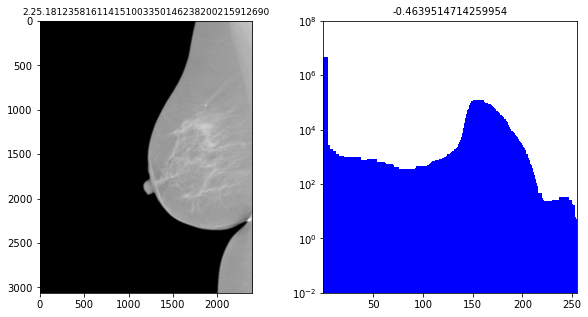

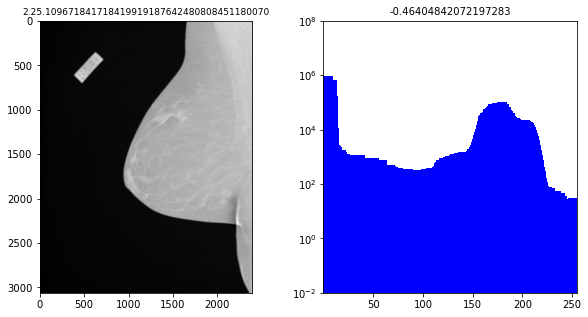

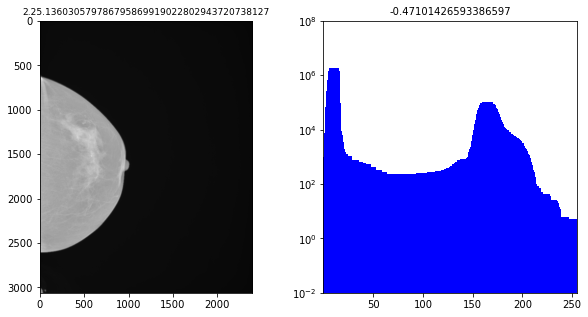

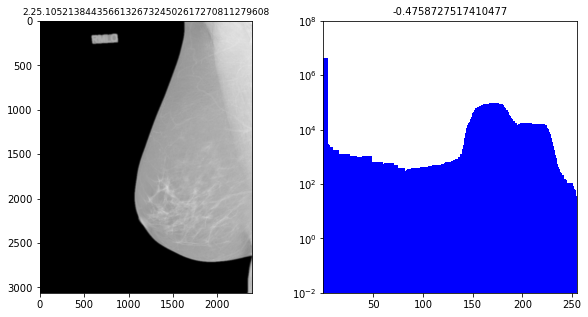

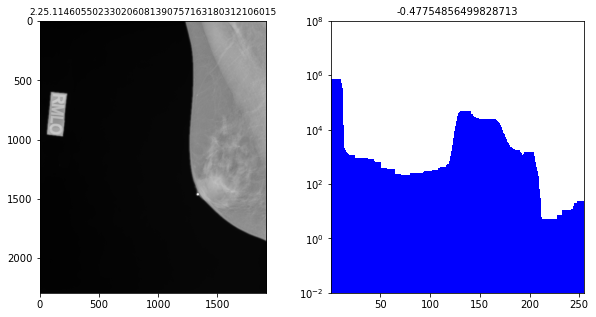

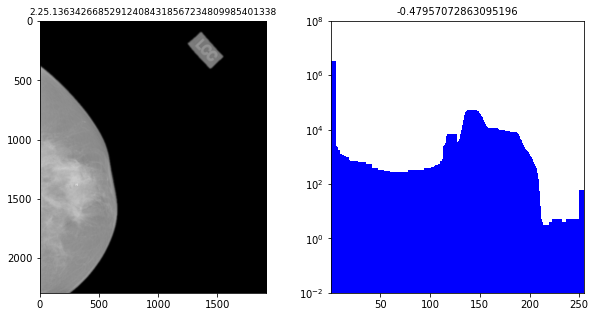

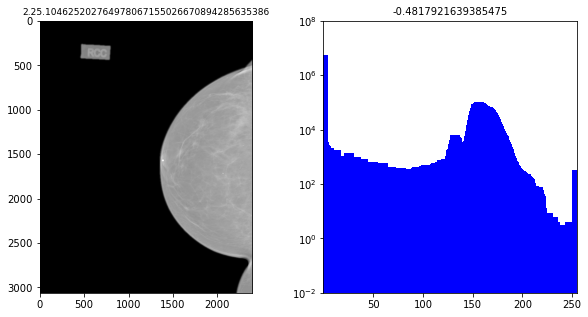

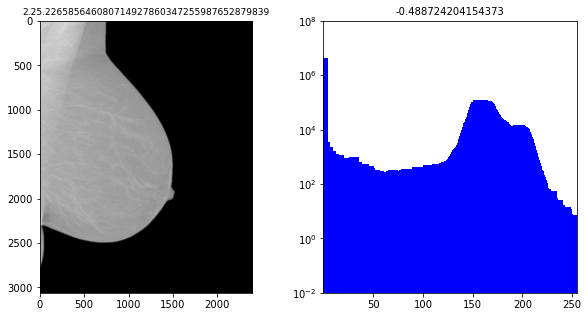

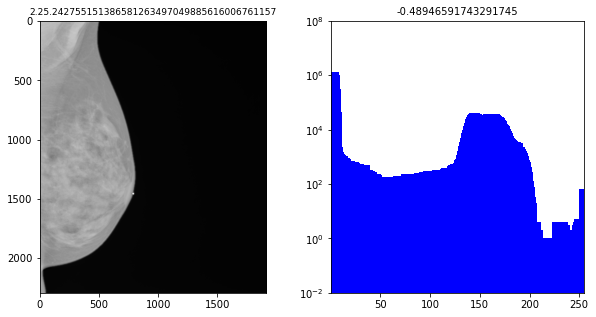

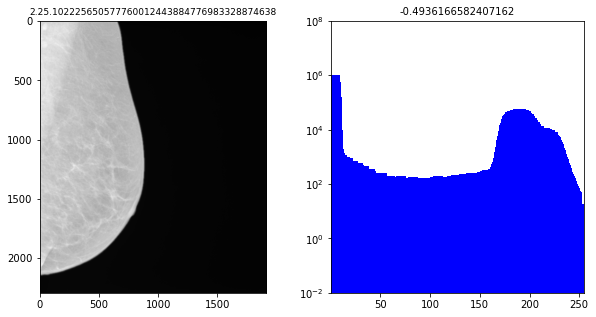

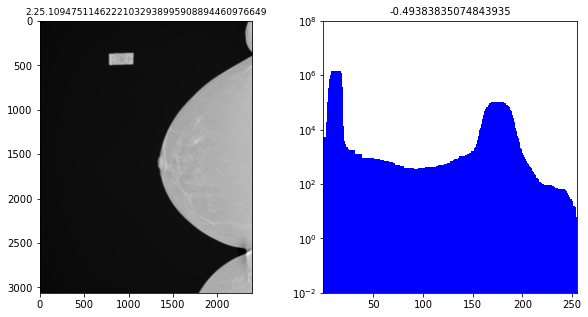

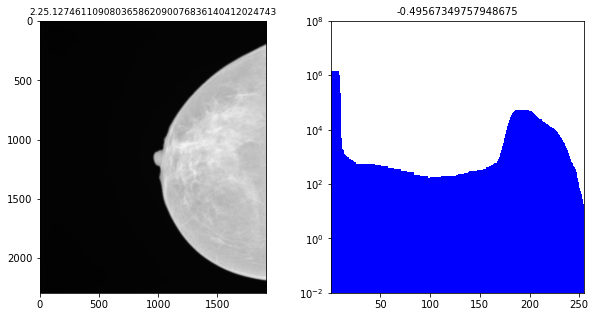

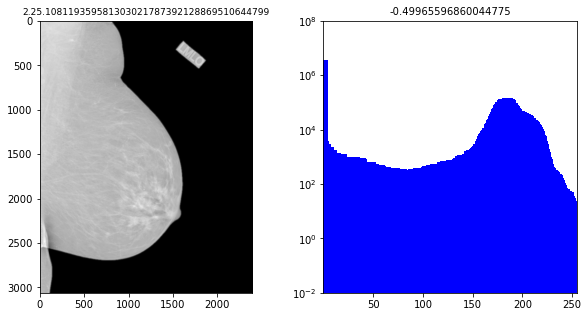

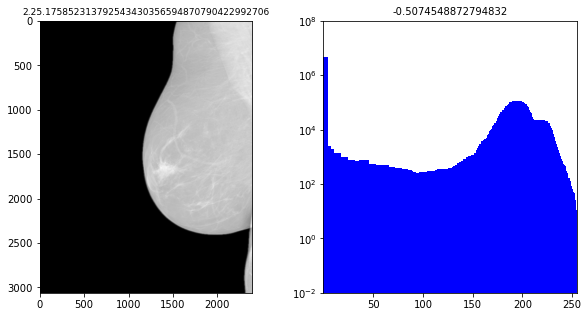

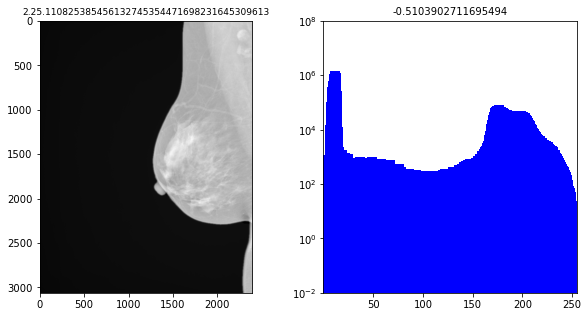

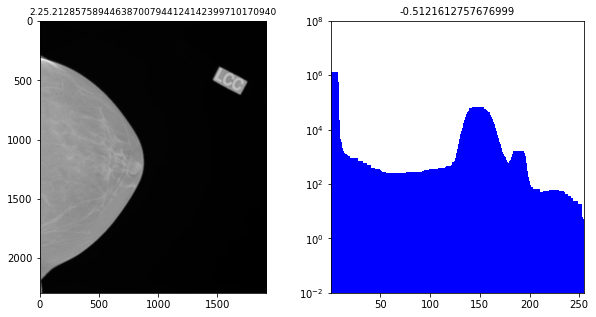

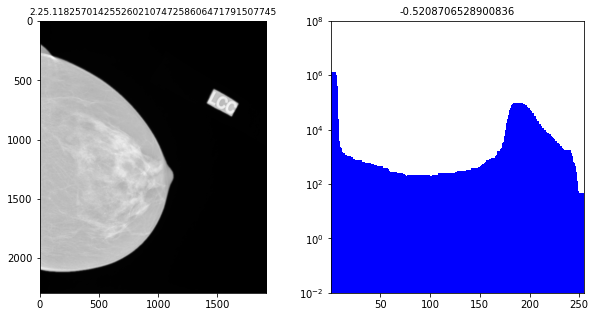

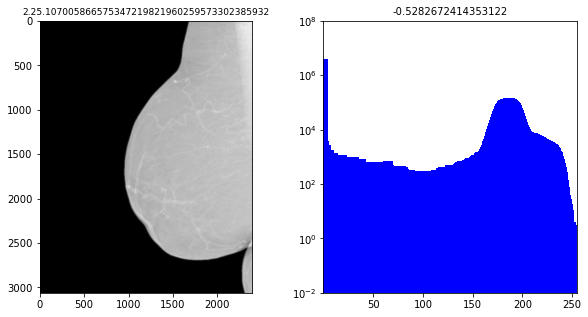

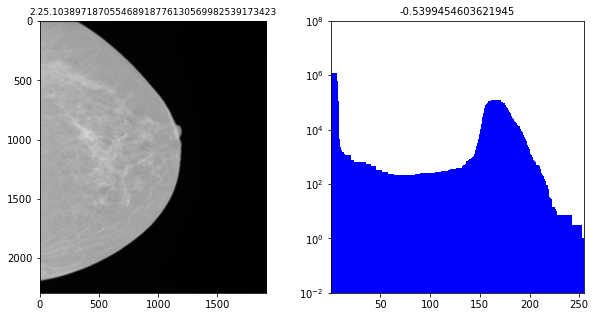

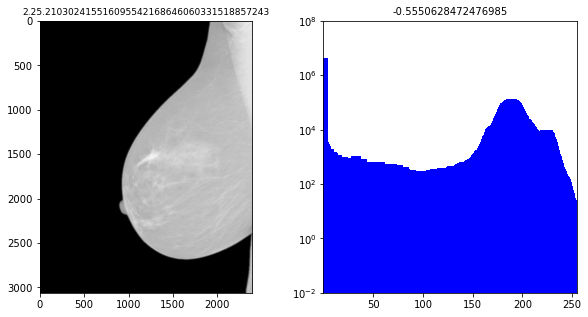

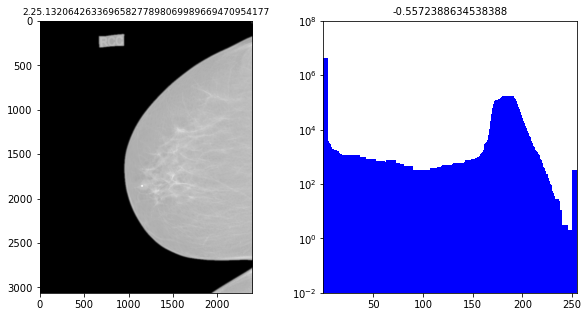

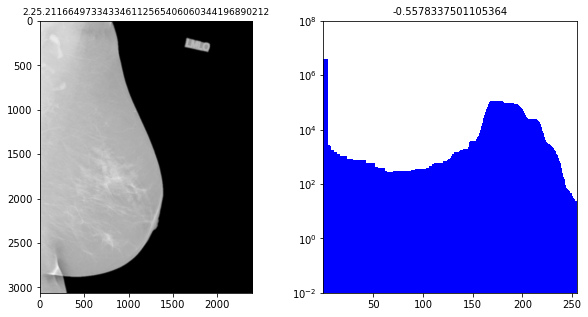

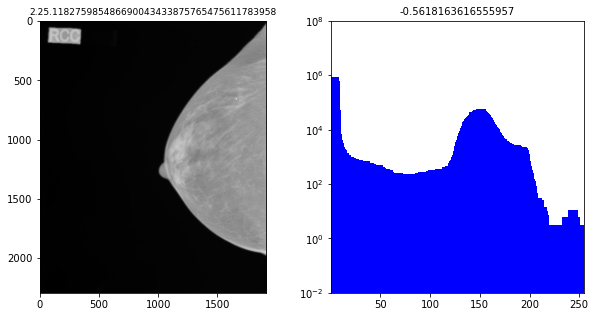

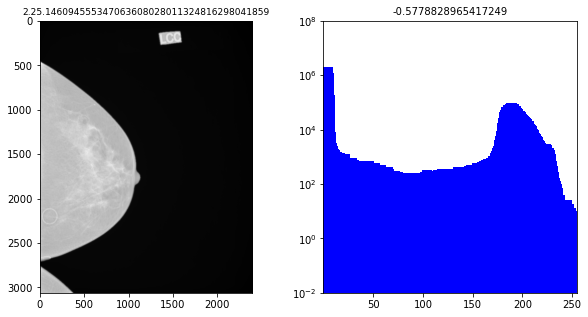

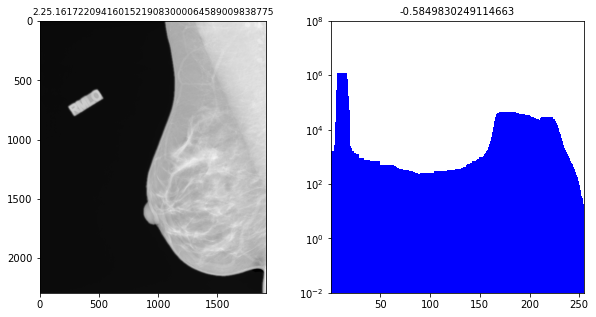

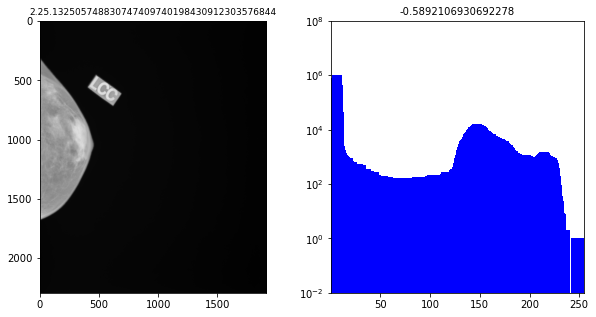

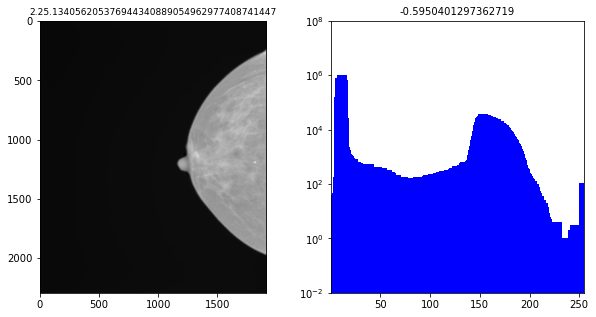

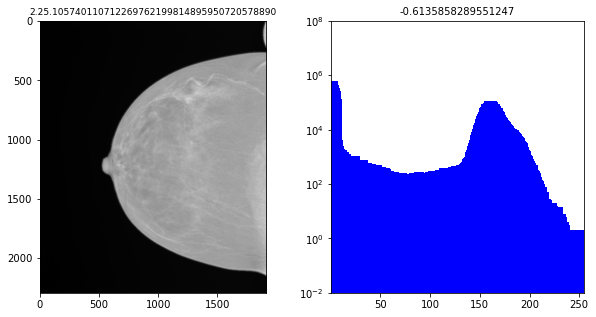

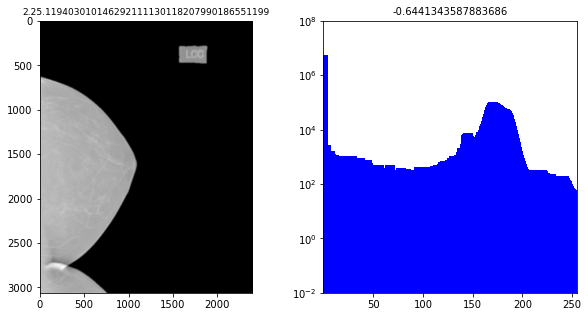

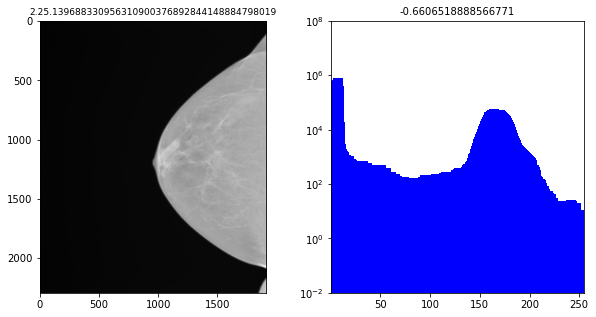

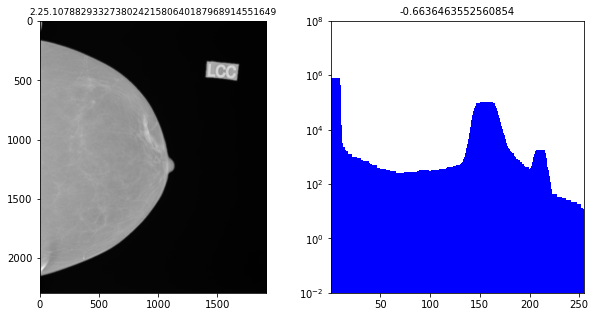

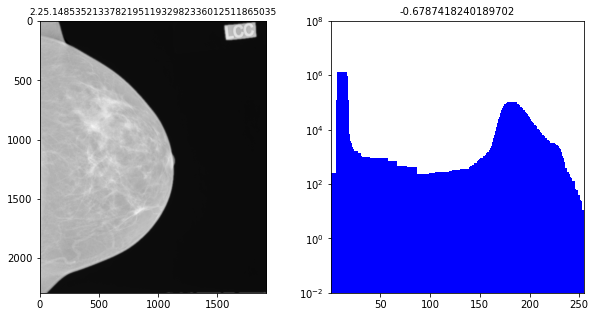

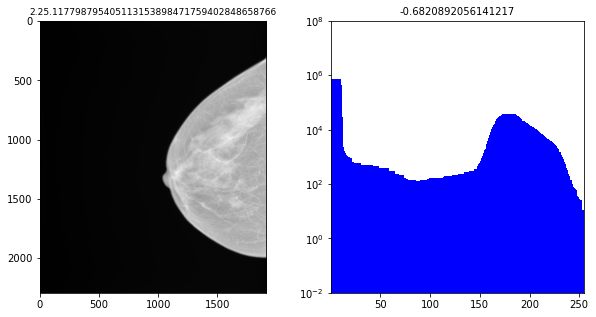

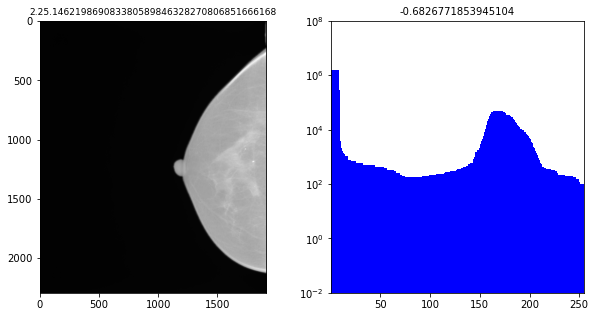

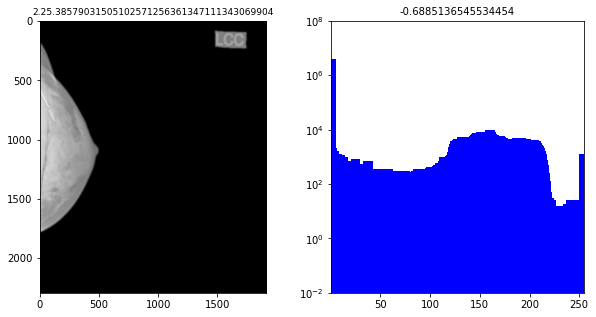

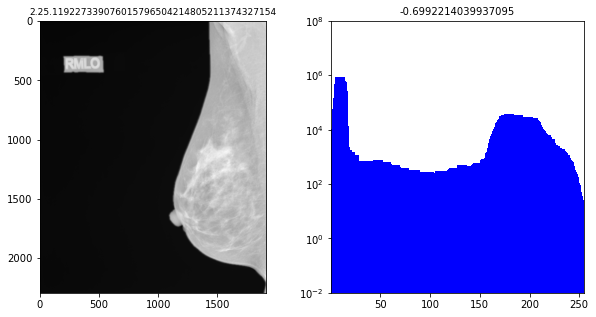

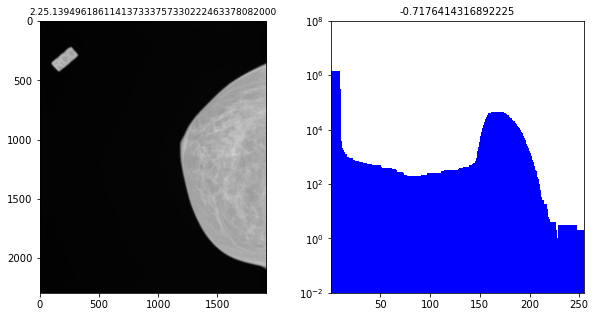

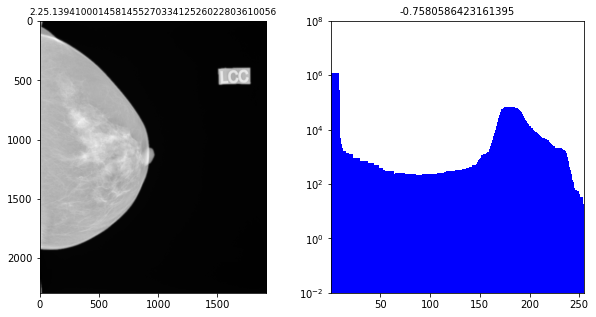

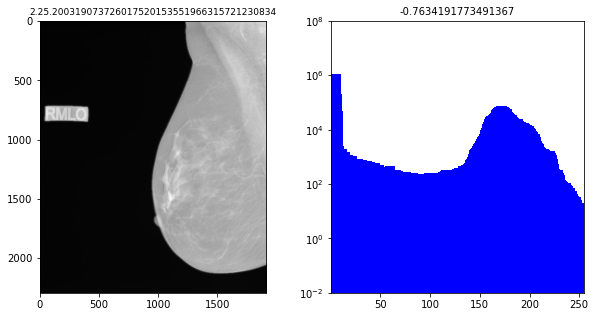

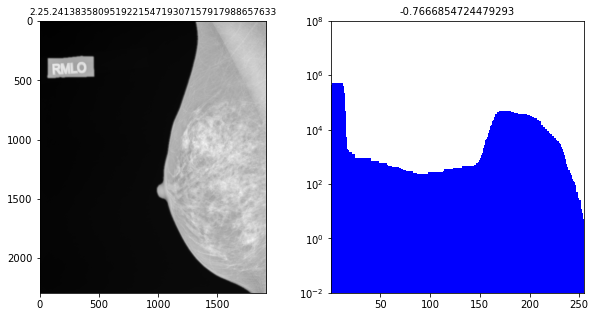

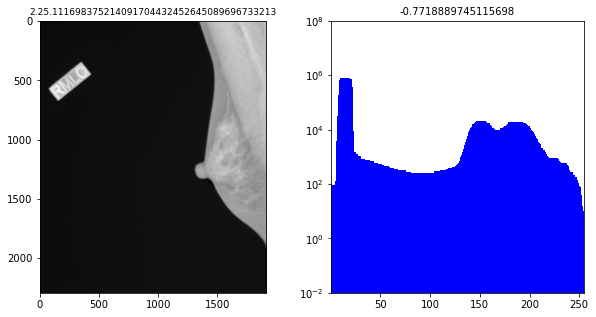

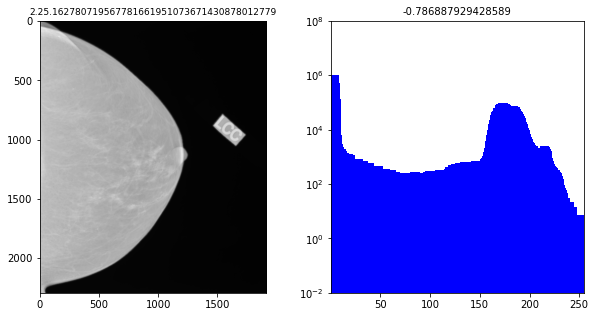

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(histograms, pyod_algorithm='SUOD')
O.Features.view_image_and_features(imgs, ['hist'], train_scores=[train_scoresX])

In [ ]:
# initialized a group of outlier detectors for acceleration
# detector_list = [LOF(n_neighbors=15), LOF(n_neighbors=20),
#                  LOF(n_neighbors=25), LOF(n_neighbors=35),
#                  COPOD(), IForest(n_estimators=100),
#                  IForest(n_estimators=200)]

# # decide the number of parallel process, and the combination method
# # then clf can be used as any outlier detection model
# clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average',
#            verbose=False)

In [42]:
O.OutlierDetector.show_records()

{
    "downsample_13%_0c4336260c734ae105e55c657faa2f17": {
        "CBLOF": 0.6153846153846154,
        "KNN": 0.6153846153846154,
        "LOF": 0.5384615384615384,
        "INNE": 0.5384615384615384,
        "FB": 0.5384615384615384,
        "COF": 0.46153846153846156,
        "AvgKNN": 0.46153846153846156,
        "MedKNN": 0.46153846153846156,
        "SOD": 0.46153846153846156,
        "Sampling": 0.38461538461538464,
        "LODA": 0.3076923076923077,
        "ECOD": 0.15384615384615385,
        "IForest": 0.15384615384615385,
        "COPOD": 0.15384615384615385,
        "LMDD": 0.15384615384615385,
        "SUOD": 0.15384615384615385,
        "DeepSVDD": 0.15384615384615385,
        "OCSVM": 0.07692307692307693,
        "SOS": 0.07692307692307693,
        "SOGAAL": 0.07692307692307693,
        "AnoGAN": 0.07692307692307693,
        "KDE": 0.0,
        "PCA": 0.0,
        "HBOS": 0.0,
        "AE": 0.0,
        "VAE": -1
    },
    "downsample_13%_0c4336260c734ae105e55c657faa2f

In [43]:
O.OutlierDetector.show_best(20)

[
    [
        "hist_24%_0edbd793162083c9c35eff69f59ea9fd",
        "CBLOF",
        0.8333333333333334
    ],
    [
        "hist_24%_7c6ddc31e0eeaa515d451ae08c239ab2",
        "CBLOF",
        0.8333333333333334
    ],
    [
        "hist_24%_97499e56cabdfb5044b9740aa82992ee",
        "CBLOF",
        0.8333333333333334
    ],
    [
        "hist_24%_d42eed3e59899ae6a1f50b6f1f338331",
        "AvgKNN",
        0.8333333333333334
    ],
    [
        "downsample_24%_7f589cf879a1a3e939cd92bea69cc1b2",
        "INNE",
        0.7916666666666666
    ],
    [
        "downsample_24%_f5c4c8781e62e7d247e2db53f30e1c7a",
        "INNE",
        0.7916666666666666
    ],
    [
        "sift_24%_1b2e6c12b75ef3ea0e5073d1a86349ca",
        "INNE",
        0.7916666666666666
    ],
    [
        "sift_24%_6cae6f047a784f47feaef997db9e49f0",
        "INNE",
        0.7916666666666666
    ],
    [
        "downsample_24%_54a69a2adb76ca15ec1593b0d9bf17fe",
        "LOF",
        0.75
    ],
    [
   

In [44]:
O.OutlierDetector.get_configuration('hist_24%_0edbd793162083c9c35eff69f59ea9fd')

{'kwargs': {'task_id': 29,
  'contamination': 0.24,
  'verbose': False,
  'n_jobs': 1,
  'norm_type': 'gaussian'}}